In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder

In [110]:
data=pd.read_excel('UsedMotorbikes.xlsx')

In [111]:
data

,Price,Brand,Model,Reg_Date,Km,Condition,Capacity,Type,Location
0,45800000.0,Honda,SH,2022,10000,Đã sử dụng,100 - 175,Tay ga,Đà Nẵng
1,48000000.0,Piaggio,Vespa,1998,336688,Đã sử dụng,100 - 175,Xe số,Đà Nẵng
2,82800000.0,Honda,SH,2019,2,Đã sử dụng,100 - 175,Tay ga,Đà Nẵng
3,58000000.0,Honda,Cub,1998,33123,Đã sử dụng,100 - 175,Xe số,Đà Nẵng
4,13500000.0,Honda,Air Blade,2012,9000,Đã sử dụng,100 - 175,Tay ga,Đà Nẵng
...,...,...,...,...,...,...,...,...,...
18824,22000000.0,Yamaha,Exciter,2016,70000,Đã sử dụng,100 - 175,Tay côn/Moto,Long An
18825,16000000.0,Honda,Winner,2018,20000,Đã sử dụng,100 - 175,Tay côn/Moto,Tp Hồ Chí Minh
18826,336000000.0,Honda,SH,2018,10000,Đã sử dụng,100 - 175,Tay ga,Tp Hồ Chí Minh
18827,11500000.0,Piaggio,Vespa,2011,19000,Đã sử dụng,100 - 175,Tay ga,Đà Nẵng


In [112]:
data.shape

(18829, 9)

In [113]:
data.isnull().sum()

Price        0
Brand        0
Model        0
Reg_Date     0
Km           0
Condition    0
Capacity     0
Type         0
Location     0
dtype: int64

In [114]:
data.duplicated().sum()

0

In [115]:
data.dtypes

Price        float64
Brand         object
Model         object
Reg_Date       int64
Km             int64
Condition     object
Capacity      object
Type          object
Location      object
dtype: object

In [116]:
le = LabelEncoder()

data["Brand"] = le.fit_transform(data["Brand"])

data["Model"] = le.fit_transform(data["Model"])

data["Type"] = le.fit_transform(data["Type"])

data["Location"] = le.fit_transform(data["Location"])

data["Condition"] = le.fit_transform(data["Condition"])

data["Capacity"] = le.fit_transform(data["Capacity"])

In [117]:
data.dtypes

Price        float64
Brand          int32
Model          int32
Reg_Date       int64
Km             int64
Condition      int32
Capacity       int32
Type           int32
Location       int32
dtype: object

In [118]:
X = data[['Brand', 'Model', 'Reg_Date', 'Km', 'Condition', 'Capacity', 'Type', 'Location']]
y = data['Price']

In [119]:
y=pd.DataFrame(y)

In [120]:
scaler = StandardScaler()
scaler.fit(y)
y = pd.DataFrame(scaler.transform(y),columns= y.columns )

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.035, random_state=42)

In [122]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

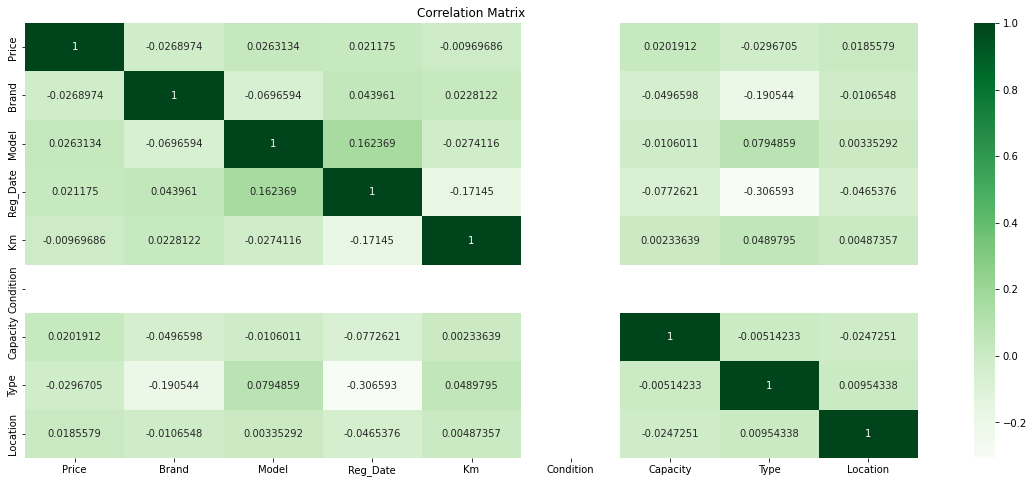

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax= plt.subplots(1,1,figsize = (20,8))

_ = ax.set_title("Correlation Matrix")
_ = sns.heatmap(data.corr(),annot=True,fmt="g",cmap="Greens")

# Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

print('R Square: ',LR.score(X_train, y_train))
print('Slope: ', LR.coef_)
print('intercept: ', LR.intercept_)

R Square:  0.0035022401513116197
Slope:  [[-3.05615736e-03  4.20273195e-04  1.49139506e-03 -5.86778533e-08
   8.67361738e-17  2.56840345e-02 -5.15212833e-02  1.22202240e-03]]
intercept:  [-2.98303305]


In [125]:
y_prediction_train = LR.predict(X_train)

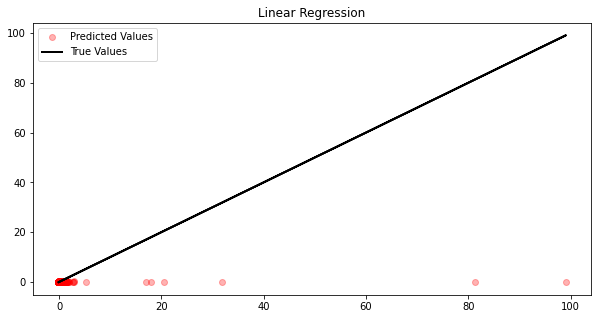

In [126]:
fig = plt.subplots(1,1,figsize = (10,5))

_ = plt.scatter(y_train,y_prediction_train,c = "red",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_train,y_train,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Linear Regression")
plt.show()

In [127]:
y_prediction_test =  LR.predict(X_test)

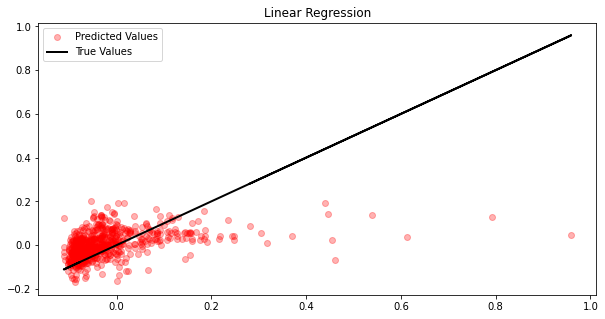

In [128]:
fig = plt.subplots(1,1,figsize = (10,5))

_ = plt.scatter(y_test,y_prediction_test,c = "red",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_test,y_test,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Linear Regression")
plt.show()

In [129]:
# Mô hình dự đoán giá xe
y_prediction_test=pd.DataFrame(y_prediction_test, columns=['p'])

# So sánh với giá hiện tại
result_compare= pd.concat([X_test,y_test,y_prediction_test],axis=1)
result_compare['Deviation']=result_compare['p']-result_compare['Price']
result_compare

,Brand,Model,Reg_Date,Km,Condition,Capacity,Type,Location,Price,p,Deviation
0,11,99,2010,25000,0,1,1,19,-0.078845,0.018575,0.097420
1,11,50,2000,20000,0,0,2,14,-0.097847,-0.099955,-0.002108
2,23,181,2006,35000,0,0,1,43,-0.054114,0.013455,0.067569
3,35,122,2013,13000,0,0,1,14,-0.070702,-0.071723,-0.001021
4,35,55,2019,16666,0,3,0,14,0.021288,0.037426,0.016138
...,...,...,...,...,...,...,...,...,...,...,...
655,11,147,2011,5,0,0,1,14,0.316862,0.009912,-0.306950
656,30,193,2010,5,0,0,2,14,-0.085782,-0.081836,0.003947
657,11,147,2021,2000,0,0,1,14,0.105738,0.024708,-0.081029
658,11,152,2019,14000,0,0,1,43,-0.008873,0.058562,0.067434


In [130]:
# Độ sai lệch tuyệt đối trung bình phần trăm
def mean_absolute_percentage_error(y_test, y_prediction_test):
  y_test, y_prediction_test = np.array(y_test), np.array(y_prediction_test)
  return np.mean(np.abs((y_test - y_prediction_test) / y_test)) * 100

In [131]:
# Độ tuyệt đối trung bình
mae = metrics.mean_absolute_error(y_test, y_prediction_test)

# Độ lỗi trung bình bình phương
mse = metrics.mean_squared_error(y_test, y_prediction_test)

# Độ lỗi trung bình gốc
rmse = np.sqrt(mse) #mse**(0.5)  

# Đo lường tỉ lệ phương sai giữa dữ liệu thực tế và dữ liệu được dự đoán
r2 = metrics.r2_score(y_test,y_prediction_test)

# Tổng sai lệch của các giá trị dự đoán so với giá trị thực tế
Total_Deviation=abs(result_compare['Deviation']).sum()

# Độ chính xác của mô hình dự đoán
mape = mean_absolute_percentage_error(y_test, y_prediction_test)

In [132]:
print("Results of sklearn metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Total_Deviation:", Total_Deviation)
print("MAPE", mape)

Results of sklearn metrics:
MAE: 0.06756345625792017
MSE: 0.009755337247906606
RMSE: 0.09876911079839995
R-Squared: 0.04799994677513597
Total_Deviation: 44.59188113022731
MAPE 625.3686803296081


# Random Forest Regressor

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

print('R Square: ', RF.score(X_train, y_train))
print('Feature Importances: ', RF.feature_importances_)

<ipython-input-134-8d359fc1e0d9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


R Square:  0.6777708966014322
Feature Importances:  [0.02529322 0.08701355 0.34577994 0.43375653 0.         0.02094295
 0.01427924 0.07293456]


In [135]:
y_prediction = RF.predict(X_train)

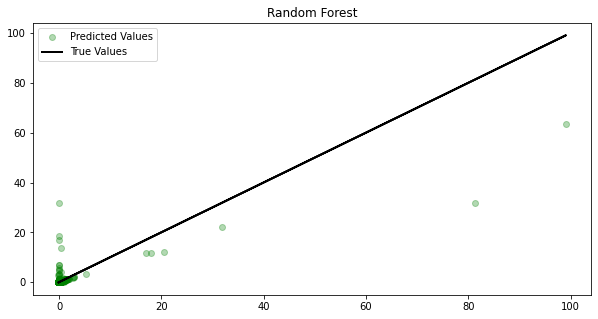

In [136]:
fig = plt.subplots(1,1,figsize = (10, 5))

_ = plt.scatter(y_train,y_prediction,c = "green",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_train,y_train,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Random Forest")
plt.show()

In [137]:
y_prediction_ = RF.predict(X_test)

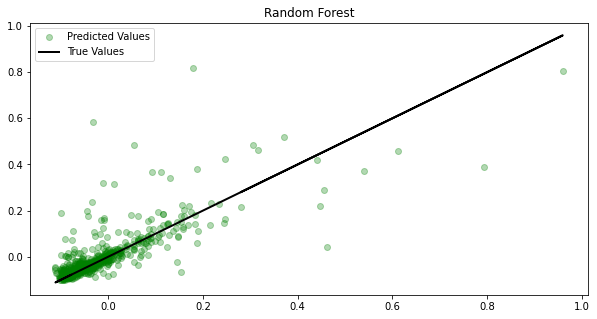

In [138]:
fig = plt.subplots(1,1,figsize = (10, 5))

_ = plt.scatter(y_test,y_prediction_,c = "green",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_test,y_test,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Random Forest")
plt.show()

In [139]:
# Mô hình dự đoán giá xe
y_prediction_=pd.DataFrame(y_prediction_, columns=['Price_predict'])

# So sánh với giá hiện tại
result_cp= pd.concat([X_test,y_test,y_prediction_],axis=1)
result_cp['Dev']=result_cp['Price_predict']-result_cp['Price']
result_cp

,Brand,Model,Reg_Date,Km,Condition,Capacity,Type,Location,Price,Price_predict,Dev
0,11,99,2010,25000,0,1,1,19,-0.078845,-0.080455,-0.001609
1,11,50,2000,20000,0,0,2,14,-0.097847,-0.048229,0.049617
2,23,181,2006,35000,0,0,1,43,-0.054114,-0.057498,-0.003384
3,35,122,2013,13000,0,0,1,14,-0.070702,-0.072165,-0.001463
4,35,55,2019,16666,0,3,0,14,0.021288,0.107277,0.085989
...,...,...,...,...,...,...,...,...,...,...,...
655,11,147,2011,5,0,0,1,14,0.316862,0.461405,0.144543
656,30,193,2010,5,0,0,2,14,-0.085782,-0.072387,0.013395
657,11,147,2021,2000,0,0,1,14,0.105738,0.193497,0.087760
658,11,152,2019,14000,0,0,1,43,-0.008873,-0.012304,-0.003431


In [140]:
# Độ sai lệch tuyệt đối trung bình phần trăm
def mean_absolute_percentage_error(y_test, y_prediction_):
  y_test, y_prediction_ = np.array(y_test), np.array(y_prediction_)
  return np.mean(np.abs((y_test - y_prediction_) / y_test)) * 100

In [141]:
# Đo lỗi trung bình tuyệt đối giữa các giá trị dự đoán và giá trị thực tế
mae = metrics.mean_absolute_error(y_test, y_prediction_)

# Đo lỗi trung bình bình phương giữa các giá trị dự đoán và giá trị thực tế
mse = metrics.mean_squared_error(y_test, y_prediction_)

# Đo lỗi trung bình căn bậc hai giữa các giá trị dự đoán và giá trị thực tế
rmse = np.sqrt(mse) #mse**(0.5)  

# Đo độ chính xác của mô hình
r2 = metrics.r2_score(y_test,y_prediction_)

# Tổng giá trị tuyệt đối của sai số (độ lệch) giữa giá trị dự đoán và giá trị thực tế
Total_Deviation=abs(result_cp['Dev']).sum()

# Độ chính xác của mô hình dự đoán
mape = mean_absolute_percentage_error(y_test, y_prediction_)

In [142]:
print("Results of sklearn metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Total_Deviation:", Total_Deviation)
print("MAPE", mape)

Results of sklearn metrics:
MAE: 0.03058548343097539
MSE: 0.0046904686673958145
RMSE: 0.0684869963379605
R-Squared: 0.5422683698640367
Total_Deviation: 20.186419064443758
MAPE 252.0896597543527


# Bagging Regressor

In [143]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

In [144]:
regr = BaggingRegressor(base_estimator= DecisionTreeRegressor(),n_estimators=10, random_state=0).fit(X_train,y_train)

c:\program files\python38\lib\site-packages\sklearn\ensemble\_bagging.py:470: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [145]:
y_pred_ = regr.predict(X_train)

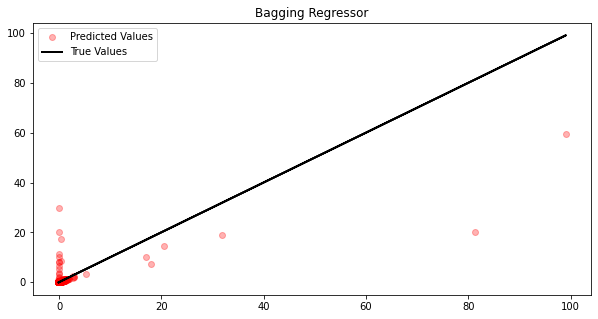

In [146]:
fig = plt.subplots(1,1,figsize = (10,5))

_ = plt.scatter(y_train, y_pred_,c = "red",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_train,y_train,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Bagging Regressor")
plt.show()

In [147]:
y_pred = regr.predict(X_test)
print('Mean squared error: ', mse)
print('Coefficient of determination (R^2): ', r2)


Mean squared error:  0.0046904686673958145
Coefficient of determination (R^2):  0.5422683698640367


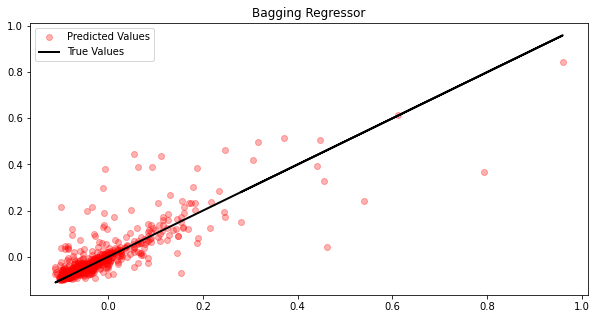

In [148]:
fig = plt.subplots(1,1,figsize = (10,5))

_ = plt.scatter(y_test, y_pred,c = "red",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_test,y_test,c = "k",lw = 2,label = "True Values")
_ = plt.legend()
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Bagging Regressor")
plt.show()

In [149]:
y_pred = pd.DataFrame(y_pred, columns=['Price_predict'])
result_c = pd.concat([X_test, y_test, y_pred], axis=1)
result_c['Dev'] = result_c['Price_predict'] - result_c['Price']
result_c

,Brand,Model,Reg_Date,Km,Condition,Capacity,Type,Location,Price,Price_predict,Dev
0,11,99,2010,25000,0,1,1,19,-0.078845,-0.081032,-0.002187
1,11,50,2000,20000,0,0,2,14,-0.097847,-0.057793,0.040053
2,23,181,2006,35000,0,0,1,43,-0.054114,-0.079026,-0.024913
3,35,122,2013,13000,0,0,1,14,-0.070702,-0.072813,-0.002111
4,35,55,2019,16666,0,3,0,14,0.021288,0.064686,0.043398
...,...,...,...,...,...,...,...,...,...,...,...
655,11,147,2011,5,0,0,1,14,0.316862,0.496318,0.179456
656,30,193,2010,5,0,0,2,14,-0.085782,0.048327,0.134109
657,11,147,2021,2000,0,0,1,14,0.105738,0.234271,0.128534
658,11,152,2019,14000,0,0,1,43,-0.008873,-0.016353,-0.007480


In [150]:
# Độ sai lệch tuyệt đối trung bình phần trăm
def mean_absolute_percentage_error(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [151]:
# Tính giá trị sai số trung bình tuyệt đối
mae = metrics.mean_absolute_error(y_test, y_pred)

# Tính giá trị sai số bình phương trung bình
mse = metrics.mean_squared_error(y_test, y_pred)

# Tính giá trị sai số chuẩn
rmse = np.sqrt(mse) #mse**(0.5)  

# Tính hệ số xác định R2 giữa giá trị thực tế và giá trị dự đoán
r2 = metrics.r2_score(y_test,y_pred)

# Tính tổng giá trị độ lệch tuyệt đối của các mẫu trong tập dữ liệu so với giá trị dự đoán
Total_Deviation=abs(result_c['Dev']).sum()

# Độ chính xác của mô hình dự đoán
mape = mean_absolute_percentage_error(y_test, y_pred)

In [152]:
print("Results of sklearn metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Total_Deviation:", Total_Deviation)
print("MAPE", mape)

Results of sklearn metrics:
MAE: 0.029783993220899137
MSE: 0.003782014276951674
RMSE: 0.06149808352259178
R-Squared: 0.6309222632228513
Total_Deviation: 19.65743552579343
MAPE 285.2970264724985


# Decision Tree

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [154]:
DT = DecisionTreeRegressor(random_state=0)

In [155]:
DT.fit(X_train, y_train)
y_predict_ = DT.predict(X_train)

print('R Square: ',regr.score(X_train, y_train))

R Square:  0.5851992635236909


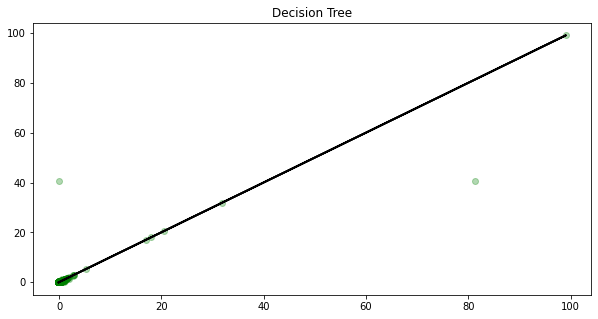

In [156]:
fig = plt.subplots(1,1,figsize = (10, 5))
_ = plt.scatter(y_train,y_predict_,c = "green",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_train,y_train,c = "k",lw = 2,label = "True Values")
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Decision Tree")
plt.show()

In [157]:
y_predict = DT.predict(X_test)

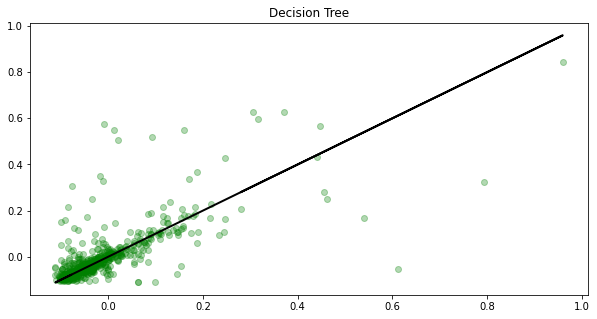

In [158]:
fig = plt.subplots(1,1,figsize = (10, 5))
_ = plt.scatter(y_test,y_predict,c = "green",alpha = 0.3,label = "Predicted Values")
_ = plt.plot(y_test,y_test,c = "k",lw = 2,label = "True Values")
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
plt.title("Decision Tree")
plt.show()

In [159]:
y_predict=pd.DataFrame(y_predict, columns=['Price_predict'])

# So sánh với giá hiện tại
result_com= pd.concat([X,y,y_predict],axis=1)
result_com['Dev']=result_com['Price_predict']-result_com['Price']
result_com

,Brand,Model,Reg_Date,Km,Condition,Capacity,Type,Location,Price,Price_predict,Dev
0,11,147,2022,10000,0,0,1,49,0.026717,-0.081258,-0.107975
1,23,181,1998,336688,0,0,2,49,0.033352,-0.054114,-0.087466
2,11,147,2019,2,0,0,1,49,0.138311,-0.085782,-0.224093
3,11,42,1998,33123,0,0,2,49,0.063513,-0.070702,-0.134215
4,11,10,2012,9000,0,0,1,49,-0.070702,0.506874,0.577576
...,...,...,...,...,...,...,...,...,...,...,...
18824,35,66,2016,70000,0,0,0,24,-0.045066,NaN,NaN
18825,11,189,2018,20000,0,0,0,43,-0.063162,NaN,NaN
18826,11,147,2018,10000,0,0,1,43,0.901978,NaN,NaN
18827,23,181,2011,19000,0,0,1,49,-0.076734,NaN,NaN


In [160]:
# Độ sai lệch tuyệt đối trung bình phần trăm
def mean_absolute_percentage_error(y_test, y_predict):
  y_test, y_predict = np.array(y_test), np.array(y_predict)
  return np.mean(np.abs((y_test - y_predict ) / y_test)) * 100

In [161]:
# Tính giá trị sai số trung bình tuyệt đối
mae = metrics.mean_absolute_error(y_test, y_predict)

# Tính giá trị sai số bình phương trung bình
mse = metrics.mean_squared_error(y_test, y_predict)

# Tính giá trị sai số chuẩn
rmse = np.sqrt(mse) #mse**(0.5)  

# Tính hệ số xác định R2 giữa giá trị thực tế và giá trị dự đoán
r2 = metrics.r2_score(y_test,y_predict)

# Tính tổng giá trị độ lệch tuyệt đối của các mẫu trong tập dữ liệu so với giá trị dự đoán
Total_Deviation=abs(result_com['Dev']).sum()

# Độ chính xác của mô hình dự đoán
mape = mean_absolute_percentage_error(y_test, y_predict)

In [162]:
print("Results of sklearn metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)
print("Total_Deviation:", Total_Deviation)
print("MAPE", mape)

Results of sklearn metrics:
MAE: 0.03367131110184523
MSE: 0.006200103433696616
RMSE: 0.07874073554200911
R-Squared: 0.3949467200485093
Total_Deviation: 83.40688101169752
MAPE 343.539536468596
